**Title:**<br> 
Predicting Total Play Length from Player and Session Characteristics using Regression

**Introduction:**<br>
Ever wonder what kind of data could be gathered from playing video games? This was done by Frank Wood from UBC, who led a research group with the department of computer science to gather data about how video games are played. With this, they had set up a Minecraft server to record player actions as data, of which could be used in a variety of different scenarios by individuals from all sorts of professions and industries. In particular, some individuals in the gaming industry could make use of this particular type of data. Especially if they want to improve and optimize playing time on their games, one such question they may ask is such that:<br>

Can we predict a player's total play time based off of their demographic and individual session characteristics? <br>

To answer this, we must first take a look at the datasets themselves. There are two datasets that we have analyzed for this project, "players.csv" and "sessions.csv". In the players dataset, there are a total of 196 unique observations, while the sessions dataset has 1535 observations recorded. The reason for this discrepancyis that each unique player can have multiple different sessions, which are recorded in the sessions dataset. <br>

The players dataset has 7 different variables:<br>
- experience (their level of proficiency at Minecraft)
- subscribe (whether they are subscribed to the newsletter)
- hashedEmail (their email connected to their Minecraft account)
- played_hours (The total amount of hours they have spent on the game)
- name (the player's name)
- gender (the player's gender)
- Age (how old the player is)
<br>

The sessions dataset has 5 different variables:<br>
- hashedEmail (the same email connected to their account)
- start_time (readable starting time)
- end_time (readable ending time)
- original_start_time (starting time)
- original_end_time (ending time)
<br>

In this project, we have chosen 5 variables to predict the total amount of play time for a player. This includes:<br>
- The total number sessions played (minutes)
- The average length of each session (minutes)
- Age
- Experience
- Subscription
<br>

As you can see, two of the variables are related to session characteristics, while the other three are related to the individual player's demographic. The experience variable categorizes players based on how familiar they are with Minecraft, and goes from beginner, amateur, regular, veteran, to pro. The subscription variable can either be true or false, and represents whether they are subscribed to the newsletter.

**Methods & Results:**<br>
First things first, we need to first load the libraries necessary for this project. In this case, it is tidyverse and tidymodels.

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Next, we read the datasets from their csv files. We used relative file paths here from the "data" folder. <br><br>
Here we also wrangled the sessions data frame a little bit too, calculating the session times from the start and end times, while also getting rid of the original start and end times.<br><br>
Then we displayed a little bit of both the players and sessions data frames to see what we are working with here.

In [2]:
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv") |>
    mutate(start_time = dmy_hm(start_time), end_time = dmy_hm(end_time), session_length_minutes = as.numeric(end_time - start_time)) |>
    select(-original_start_time, -original_end_time)

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,session_length_minutes
<chr>,<dttm>,<dttm>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,36
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,11
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,122


For the next step, we performed further wrangling to create the necessary variables for regression later on.<br><br>
We group the hashed emails together so we have the sessions from each player together, then counted them to find the total number of sessions (sessions_num). Along with this, we found the average session length by calculating the average all the session lengths (average_session_length). Lastly, we calculated the total time played by adding together all the sessions lengths (total_play_length).<br><br>
We displayed this data frame to see the edits made.


In [3]:
sessions_summary <- sessions |>
    group_by(hashedEmail) |>
    summarise(sessions_num = n(), 
              average_session_length = mean(session_length_minutes), 
              total_play_length = sum(session_length_minutes))

head(sessions_summary)

hashedEmail,sessions_num,average_session_length,total_play_length
<chr>,<int>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,53.00000,106
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,30.00000,30
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,11.00000,11
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13,32.15385,418
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2,35.00000,70
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1,10.00000,10


Here, we used the "merge" function to combine the players and summarised sessions datasets together, matching the observations with their hashed emails.<br><br>
Next, we convered the subscribe and experience variables to factors, while also getting rid of all the unneccesary variables that won't be used for analyse. This leaves us with experience, subscribe, session numbers, average session length, total play time, and age. <br><br>
The reason we got rid of the old total play time was because it was measured in hours, while also being slightly inaccurate.

In [4]:
players_sessions <- merge(players, sessions_summary, by = "hashedEmail") |>
    mutate(subscribe = as.factor(subscribe), 
           experience = as.factor(experience),
           age = Age) |>
    select(-played_hours, -Age, -gender, -hashedEmail, -name)

           
head(players_sessions)

,experience,subscribe,sessions_num,average_session_length,total_play_length,age
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,Regular,TRUE,2,53.00000,106,20
2,Pro,FALSE,1,30.00000,30,21
3,Beginner,TRUE,1,11.00000,11,17
4,Regular,TRUE,13,32.15385,418,17
5,Pro,TRUE,2,35.00000,70,17
6,Veteran,FALSE,1,10.00000,10,19


The next thing we did was plot scatter plot visualizations of total play time versus the variables that are numerical. <br><br>
Here, we can see that there are linear relationships between total play time with the average session length and number of sessions variables. On the otherhand, there does not appear to be any sort of relationship with the age of the players.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


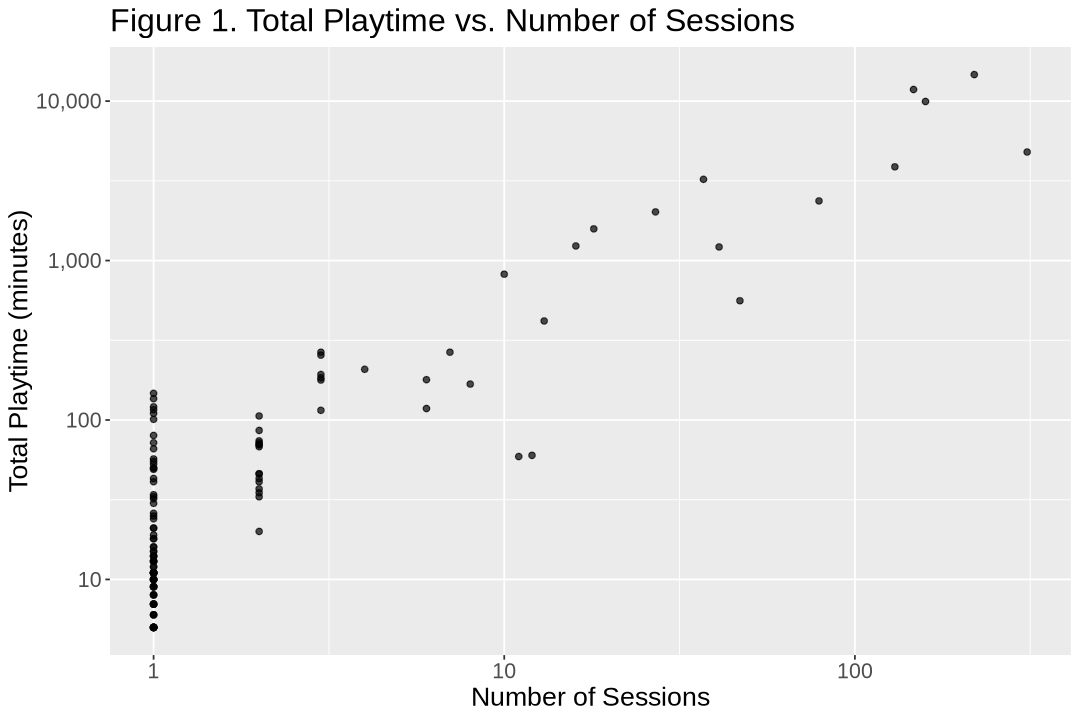

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


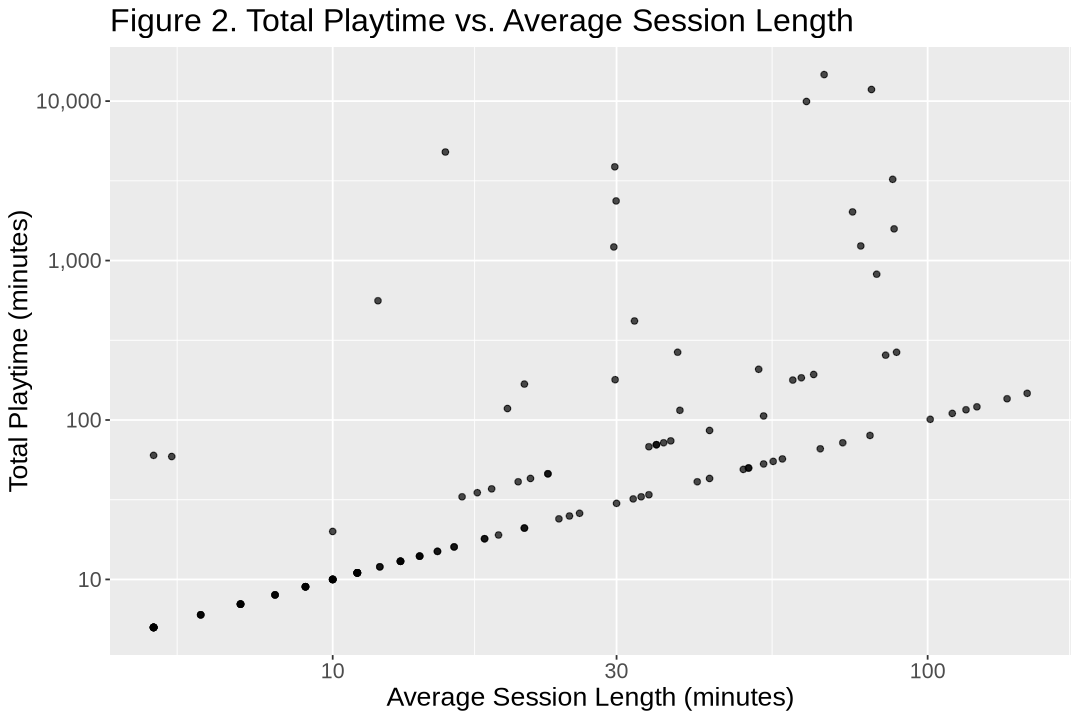

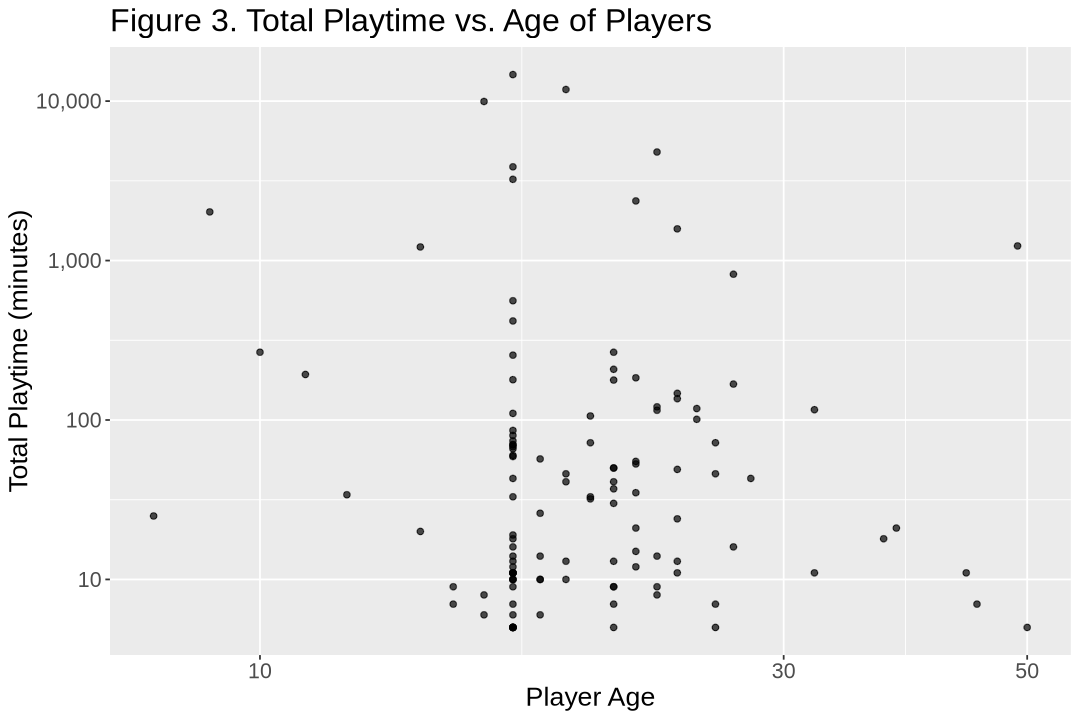

In [5]:
options(repr.plot.width = 9, repr.plot.height = 6)


num_sessions_plot <- players_sessions |>
    ggplot(aes(x = sessions_num, y = total_play_length)) +
    geom_point(alpha = 0.7) +
    labs(
    title = "Figure 1. Total Playtime vs. Number of Sessions",
    x = "Number of Sessions",
    y = "Total Playtime (minutes)") +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma()) +
    theme(text = element_text(size = 16))

average_sessions_length_plot <- players_sessions |>
    ggplot(aes(x = average_session_length, y = total_play_length)) +
    geom_point(alpha = 0.7) +
    labs(
    title = "Figure 2. Total Playtime vs. Average Session Length",
    x = "Average Session Length (minutes)",
    y = "Total Playtime (minutes)") +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma()) +
    theme(text = element_text(size = 16))

age_plot <- players_sessions |>
    ggplot(aes(x = age, y = total_play_length)) +
    geom_point(alpha = 0.7) +
    labs(
    title = "Figure 3. Total Playtime vs. Age of Players",
    x = "Player Age",
    y = "Total Playtime (minutes)") +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma()) +
    theme(text = element_text(size = 16))

num_sessions_plot
average_sessions_length_plot
age_plot

Now it is time to test out the linear regression model. This regression model in particular is useful for the equation that it generates, which is extremely helpful in showing the impact each variable has on the total play time. Additionally, this model can be used to predict values for variables outside of the range of data the model was trained on. Though, one weakness of this model is that it doesn't work too well with non-linear relationships. <br><br>
To execute this, we first split the dataset into a training and testing portion with 75% allocated to training and 25% allocated to testing. We then made the model and recipe that includes the 5 variables for this analysis. We then fitted the recipe and model and trained it on the training portion of the dataset.<br><br>
The "coefficients" portion of the output, we can see the values for the equation of the line. We will touch upon this later in discussion.

In [6]:
set.seed(0)
data_split <- initial_split(players_sessions, prop = 0.75, strata = total_play_length)
training <- training(data_split)
testing  <- testing(data_split)

lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lm_recipe <- recipe(total_play_length ~ sessions_num + average_session_length + age + experience + subscribe, data = training)

lm_fit <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spec) |>
    fit(data = training)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
           (Intercept)            sessions_num  average_session_length  
               -260.63                   39.08                   13.41  
                   age      experienceBeginner           experiencePro  
                -17.34                   94.50                   37.31  
     experienceRegular       experienceVeteran           subscribeTRUE  
                910.95                  236.87                   41.47  


Here, we calculate the RMSE value of the model using the training data. The value of which is 1179.7, which means that the result predicted is on average 1179.7 minutes different from the real number.

In [7]:
lm_rmse <- lm_fit |>
        predict(training) |>
        bind_cols(training) |>
        metrics(truth = total_play_length, estimate = .pred) |>
        filter(.metric == "rmse") |>
        select(.estimate) |>
        pull()
lm_rmse

[1] 1179.652

Here, we calculate the RMSPE value of the model off the testing data. We end up with a value of 519.9, which is significantly better than the RMSE. This means the predicted result was on average 519.9 minutes off the actual number.

In [8]:
lm_rmspe <- lm_fit |>
        predict(testing) |>
        bind_cols(testing) |>
        metrics(truth = total_play_length, estimate = .pred) |>
        filter(.metric == "rmse") |>
        select(.estimate) |>
        pull()
lm_rmspe

[1] 519.9123

Even though we already completed a linear regression model, we decided to test out the K nearest neighbors model on this dataset too. One advantage of using KNN regression is that it is good for non-linear relationships. Though this model is particularly weak when dealing with large amounts of data, it shouldn't be a problem here as it the dataset we are using is not too large. Other weaknesses for this regression model is that it isn't reliable with predicting values outside the training range, and that it doesn't work well with large numbers of predictors (we have 5 here). <br><br>
We also decided on using cross validation here, which might not have been the best decision due to the dataset being so small. Additionally, the data is not processed so the RMPSE can be compared to the linear regression model already done<br><br>
The resulting best K value ended up being 1, which may not be optimal due to overfitting. Anyways this model was done just to compare it to the linear regression model so the results from it are not too significant.

In [9]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(total_play_length ~ sessions_num + average_session_length + age + experience + subscribe, data = training)

vfold <- vfold_cv(training, v = 5, strata = total_play_length)

gridvals <- tibble(neighbors = seq(1, 25))

knn_multi <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    tune_grid(vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse") |>
    filter(mean == min(mean))

best_k <- knn_multi |>
    pull(neighbors)
best_k

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 19 rows.
               ✖ Assigned data has 20 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 20 to size 19.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 16 rows.
               ✖ Assigned data has 17 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 17 to size 16.

There were issues with some computations   A: x1
There were issues with some computations   A: x2   B: x1

→ C | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 15 rows.
               ✖ Assigned d

[1] 1

Here, we apply the fitted model to the testing data to find the RMSPE, which turns out to be 560.5. This is decent, but not as good as the RMPSE from the linear regression model.

In [10]:
knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("regression")

knn_multi_fit <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec_new) |>
  fit(data = training)

knn_multi_preds <- knn_multi_fit |>
  predict(testing) |>
  bind_cols(testing)

knn_rmspe <- metrics(knn_multi_preds, truth = total_play_length, estimate = .pred) |>
                     filter(.metric == 'rmse')

knn_rmspe

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,560.4794


Regrettably, the results of our models' analyses could not be displayed with visualizations due us using 5 different predictors. Unless we tried using a 5D plot, it wouldn't work out too well. As such, the only results we have here are the RMSPE values of each regression model, along with the coefficients for the equation of our linear regression model, which are the following:
- Intercept = -260.63
- Number of sessions = 39.08
- Average session length (minutes) = 13.41
- Age = -17.34
- Experience (beginner) = 94.50
- Experience (regular) = 910.95
- Experience (veteran) = 236.87
- Experience (pro) = 37.31
- subscribe (true) = 41.47
<br>

One question that may be asked when first seeing this data is where the amateur option for experience and true option for subscribe are. The reason they are not present is because they are the baseline category. To put it simply, the coefficients for the numerical variables will always be present in the equation for total time played. On the otherhand, the categorical variables will only be added if you meet the criteria for the coefficient. Otherwise you wouldn't need to add anything else in the case that you are an amateur player who isn't subscribed.<br><br>
The equation would look like this: <br>
Total time played = -260.63 + 39.08(number of sessions) + 13.41(average session length) - 17.34(age) + (experience coefficient if applicable) + (subscribe coefficient if applicable)<br><br>
Heres an example for a theoretical player who has played 10 sessions, averaging 30 minutes, is 20 years old, a regular, and isn't subscribed:<br>
Total time played = -260.63 + 39.08(10) + 13.41(30) - 17.34(20) + 910.95 = 1096.62 minutes

**Discussion:**

With two regression models made, the one that we suggest using is the linear regression model. Compared to the KNN version, the linear model can more applicable to different predictions, and provides particular insights into every aspect of the predictor variables. Unlike in KNN, here we can see how every variable can affect total time played and we can then make unique observations that we may wish to test upon in the future. Additionally, the linear regression model produced a lower RMPSE at 519.9, which puts it above the KNN model. <br><br> 
From the intercept of the linear equation, we see that it starts off negative, but should eventually be offset by the number of sessions played and minutes per session. This doesn't come as too much of a surprise, as obviously there wouldn't be any time played if you don't have any sessions, but also the experience level has been found to play a big role on time played. <br> <br>
The number of session and session lengths coefficients also don't come as a surprise. It is obvious that more sessions and time would result in more total time. <br><br>
The age coefficient is interesting. The negative number means that older players usually spend less total time on the game, while younger players spend more total time. This shouldn't be very surprising, but it is still interesting to see represented here in the equation.<br><br>
For the experience variable, it is even more intriguing. As the amateur level is baseline, it means that amateurs usually spend the least time on the game. The level under the amateurs are the beginners, who spend on average around 94 more minutes of total time. The next after amateurs are regulars, who shockingly usually spend 910.95 more minutes than their amateur counterparts. Then next are veterans, who spend a solid 236 minutes more. Perhaps more shocking than the regulars value are the pros, who spend the least more at 37.31 minutes. Although we can not ascertain the reason for this phenomena, one hypothesis could be that they are too busy playing on more specialized pro servers, rather than the UBC server.<br><br> 
The subscribe coefficient also makes sense, as players who are subscribed to the newsletter spend more time playing. <br><br>
With all of these findings, this information could be useful to game companies or people who are trying to run servers to find the certain demographics that would play their games the most. For example, they could target regular players that are young to have more active players on their servers.<br><br>
Towards the future, some findings from this analysis could be explored in future studies. Particularly, the reason why pro players spend very little time on the server.
